In [11]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.config import list_physical_devices
from tensorflow.config.experimental import set_memory_growth

import cv2
from tensorflow import device
import matplotlib.pyplot as plt #Для отрисовки графиков

In [12]:
set_memory_growth(list_physical_devices('GPU')[0], True)

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train = cv2.bitwise_not(x_train.reshape(x_train.shape[0], 28, 28, 1))
x_test = cv2.bitwise_not(x_test.reshape(x_test.shape[0], 28, 28, 1))

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [15]:
batch_size = 64 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)      

In [17]:
dataGen = ImageDataGenerator(rotation_range=15,width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.15,zoom_range=[0.75,1.25],validation_split=0.2)
dataGen.fit(x_train)

train_generator = dataGen.flow(x_train, y_train, batch_size=64, shuffle=True, 
                               seed=2, save_to_dir=None, subset='training')

In [18]:
with device('/CPU:0'):
    history = model.fit(train_generator,
                        batch_size=batch_size, 
                        epochs=20,
                        validation_data=(x_test, y_test),
                        verbose=1)

Epoch 1/20
750/750 [==============================] - 179s 237ms/step - loss: 0.3953 - accuracy: 0.8811 - val_loss: 0.0909 - val_accuracy: 0.9731
Epoch 2/20
750/750 [==============================] - 179s 239ms/step - loss: 0.1397 - accuracy: 0.9573 - val_loss: 0.0763 - val_accuracy: 0.9764
Epoch 3/20
750/750 [==============================] - 180s 240ms/step - loss: 0.1060 - accuracy: 0.9682 - val_loss: 0.0434 - val_accuracy: 0.9866
Epoch 4/20
750/750 [==============================] - 180s 240ms/step - loss: 0.0930 - accuracy: 0.9720 - val_loss: 0.0490 - val_accuracy: 0.9856
Epoch 5/20
750/750 [==============================] - 180s 240ms/step - loss: 0.0867 - accuracy: 0.9744 - val_loss: 0.0521 - val_accuracy: 0.9825
Epoch 6/20
750/750 [==============================] - 180s 240ms/step - loss: 0.0799 - accuracy: 0.9766 - val_loss: 0.0656 - val_accuracy: 0.9802
Epoch 7/20
750/750 [==============================] - 180s 240ms/step - loss: 0.0728 - accuracy: 0.9793 - val_loss: 0.0355 -

In [19]:
model.save('ConvRecognition.keras')

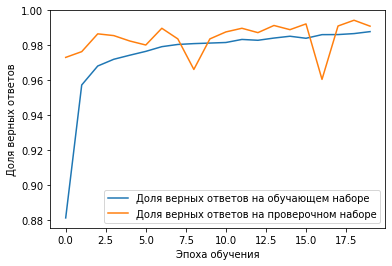

In [20]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()